<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_7_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 - Load and Prepare the Oxford-IIIT Pets Dataset [5 Marks]
Loading the Dataset
Load the dataset from torchvision.datasets.OxfordIIITPet. Note that there are two partitions available, and you should use 'trainval' for training and validation, and 'test' for testing.

Report Number of Classes
Count Classes: Determine the number of unique pet breeds (classes) in the dataset.

Visualize the Dataset
Random Sample: Display one randomly picked image from each class to visualize the dataset.

One-Hot Encoding of Labels
Transform Labels: Convert class labels into one-hot encoded format.

Resize Images
Apply Resize: Use torchvision.transforms.Resize to resize all images to 128x128 pixels with bicubic interpolation.

Class Distribution
Plot Bar Graph: Plot a bar graph showing the distribution of classes to determine if the dataset is balanced or imbalanced.


Number of classes: 37


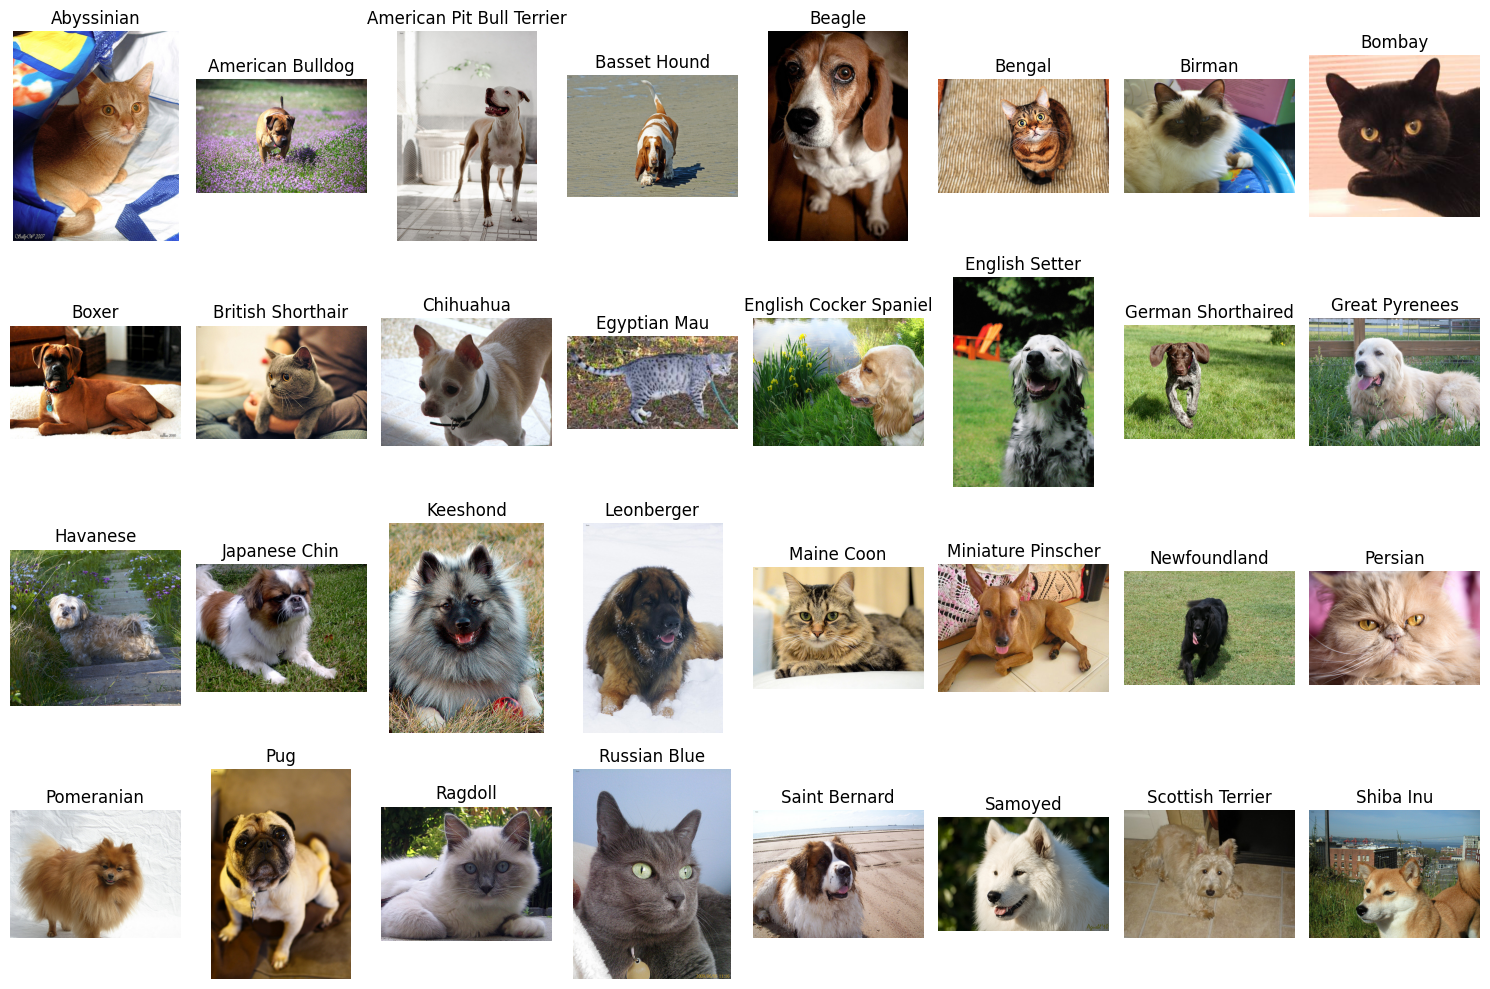

Resized image shape: torch.Size([3, 128, 128])


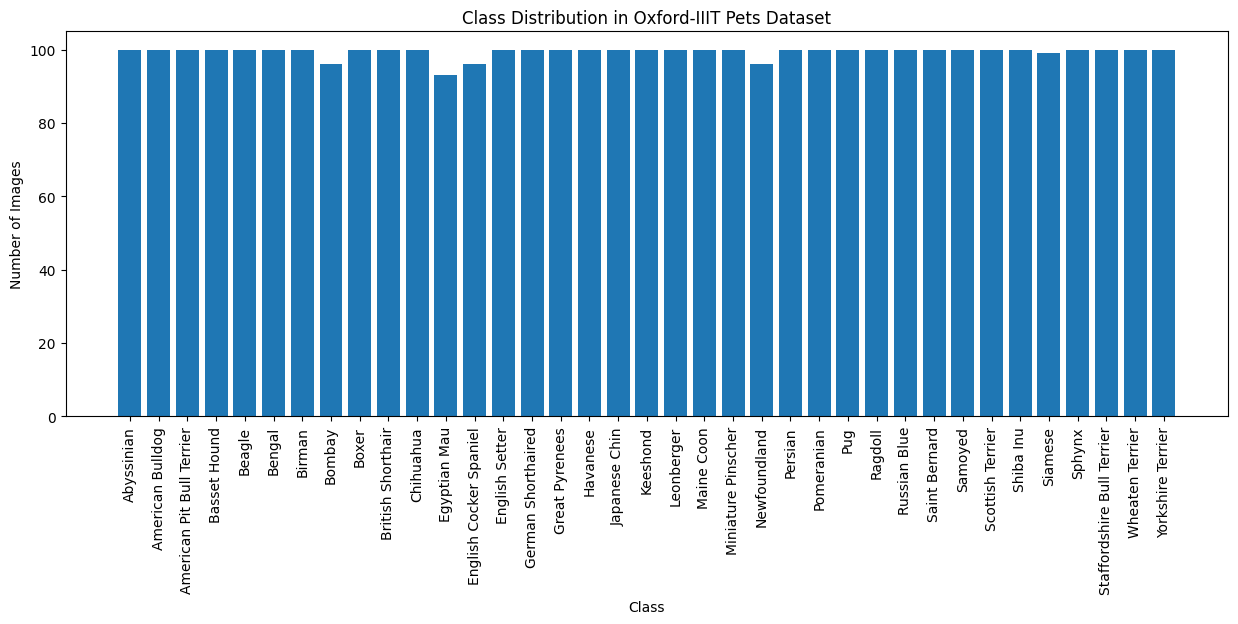

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load the dataset from torchvision.datasets.OxfordIIITPet
dataset = OxfordIIITPet(root='./data', split='trainval', download=True)

# Determine the number of unique pet breeds (classes) in the dataset
no_of_class = len(dataset.classes)
print(f"\nNumber of classes: {no_of_class}")

# Display one randomly picked image from each class to visualize the dataset.
plt.figure(figsize=(15, 10))
class_samples = {}

for img, label in dataset:
    if label not in class_samples:
        class_samples[label] = img

        # Display the image in a grid layout
        plt.subplot(4, 8, len(class_samples))
        plt.imshow(np.array(img))
        plt.title(dataset.classes[label])
        plt.axis('off')

        # Stop once 32 images have been displayed
        if len(class_samples) == 32:
         break

plt.tight_layout()  # Adjust spacing to avoid overlapping elements
plt.show()

# One-Hot Encode the labels for all images
def one_hot_encode(labels, num_classes):
    # Convert class labels into a one-hot encoded format
    return np.eye(num_classes)[labels]

# Get all labels from the dataset
labels = [dataset[i][1] for i in range(len(dataset))]

# Perform one-hot encoding
one_hot_labels = one_hot_encode(labels, no_of_class)

# Resize all images to 128x128 pixels using bicubic interpolation
# Define the transformation pipeline with resizing
transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor()
])

# Apply the resizing transform to the dataset
resized_dataset = OxfordIIITPet(root='./data', split='trainval', download=True, transform=transform)

# Access a resized image and print its shape as an example
resized_img, label = resized_dataset[0]
print("Resized image shape:", resized_img.shape)

# Plot a bar graph showing the class distribution
# Count the occurrences of each class
class_counts = Counter([dataset[i][1] for i in range(len(dataset))])

# Plot the class distribution
plt.figure(figsize=(15, 5))
plt.bar(class_counts.keys(), class_counts.values())  # Bar plot for class frequency
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Oxford-IIIT Pets Dataset")

# Label the x-axis with class names
plt.xticks(list(class_counts.keys()), [dataset.classes[label] for label in class_counts.keys()], rotation=90)
plt.show()




#Task 2 - Data Splitting [1 Marks]
Split Dataset
Divide the 'trainval' partition of the dataset into training (80%), validation (20%). Use the 'test' partition for testing your model. Ensure Balanced Splits: Ensure that each partition maintains similar class distributions.


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the 'trainval' dataset into training (80%) and validation (20%) sets
# This ensures that the class distributions are preserved across the splits.
train_data, valid_data = train_test_split(
    resized_dataset,
    test_size=0.2,
    stratify=[resized_dataset[i][1] for i in range(len(resized_dataset))],
    random_state=42
)

# Loading the test dataset
test_data = OxfordIIITPet(root='./data', split='test', download=True, transform=transform)

# Display the counts of samples in each dataset
print(f"Training samples count: {len(train_data)}")
print(f"Validation samples count: {len(valid_data)}")
print(f"Test samples count: {len(test_data)}")


Training samples count: 2944
Validation samples count: 736
Test samples count: 3669


#Task 3 -  Design a CNN Model [7 Marks]
Model Architecture
Define Layers: Design a CNN with a suitable number of convolutional layers, MaxPooling layers, and fully connected layers. Adjust Filters: Choose appropriate numbers of filters and kernel sizes for each convolutional layer.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PetClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super(PetClassifierCNN, self).__init__()

        # Define the first convolutional layer with 32 filters
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Define the second convolutional layer with 64 filters
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Define the third convolutional layer with 128 filters
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=128 * 16 * 16, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        # Apply convolution and pooling layers with ReLU activation
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Create an instance of the PetClassifierCNN model
model = PetClassifierCNN(num_classes=no_of_class)  # Ensure that no_of_classes is defined

# Output the architecture of the model
print(model)


PetClassifierCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=37, bias=True)
)


#Task 4 - Training the Model [5 Marks]
Loss Function
Use an appropriate loss function for this classification task.

Training Setup
Optimizer: Use SGD with an appropriate learning rate and momentum. Learning Rate Scheduling: Apply torch.optim.lr_scheduler.ReduceLROnPlateau for learning rate scheduling. Batch Size: Choose a suitable batch size for training.

Monitor Losses: Track training and validation losses during training.

Epoch [1/10]
Training Loss: 3.6131
Validation Loss: 3.6085
Epoch [2/10]
Training Loss: 3.5911
Validation Loss: 3.5513
Epoch [3/10]
Training Loss: 3.4771
Validation Loss: 3.4666
Epoch [4/10]
Training Loss: 3.3676
Validation Loss: 3.3902
Epoch [5/10]
Training Loss: 3.2659
Validation Loss: 3.3560
Epoch [6/10]
Training Loss: 3.1216
Validation Loss: 3.3464
Epoch [7/10]
Training Loss: 2.9857
Validation Loss: 3.2858
Epoch [8/10]
Training Loss: 2.8097
Validation Loss: 3.2273
Epoch [9/10]
Training Loss: 2.5656
Validation Loss: 3.2973
Epoch [10/10]
Training Loss: 2.2303
Validation Loss: 3.4252


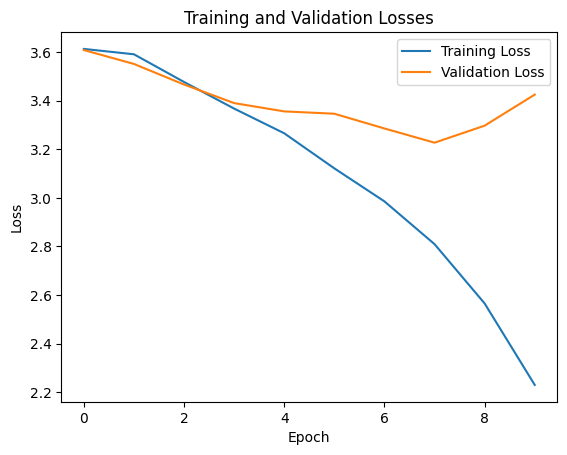

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set up the loss function for classification tasks
loss_function = nn.CrossEntropyLoss()

# Initialize the optimizer using Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Configure the learning rate scheduler to reduce the learning rate based on validation loss
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)

# Specify the batch size
batch_size = 32

# Define the total number of epochs for training
num_epochs = 10

# Create data loaders for the training and validation datasets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)

# Function to compute accuracy
def compute_accuracy(predictions, true_labels):
    _, predicted_classes = torch.max(predictions.data, 1)
    correct_predictions = (predicted_classes == true_labels).sum().item()
    accuracy_percentage = (correct_predictions / len(true_labels)) * 100
    return accuracy_percentage

# Lists to keep track of training and validation losses
train_losses = []
valid_losses = []

# Begin training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_train_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        predictions = model(images)
        loss = loss_function(predictions, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation phase
    model.eval()
    total_valid_loss = 0.0

    with torch.no_grad():  # Disable gradient calculations
        for images, labels in valid_loader:
            predictions = model(images)  # Forward pass
            loss = loss_function(predictions, labels)  # Calculate loss
            total_valid_loss += loss.item()  # Accumulate validation loss

    average_valid_loss = total_valid_loss / len(valid_loader)
    valid_losses.append(average_valid_loss)

    # Output training and validation losses for the epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    print(f"Training Loss: {average_train_loss:.4f}")
    print(f"Validation Loss: {average_valid_loss:.4f}")

    # Adjust learning rate using the scheduler
    lr_scheduler.step(average_valid_loss)

# Plot the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()


#Task 5 - Evaluate the Model [2 Marks]
Test Set Performance
Model Evaluation: Evaluate the trained model on the test set. Confusion Matrix: Generate and display the confusion matrix for the test set.

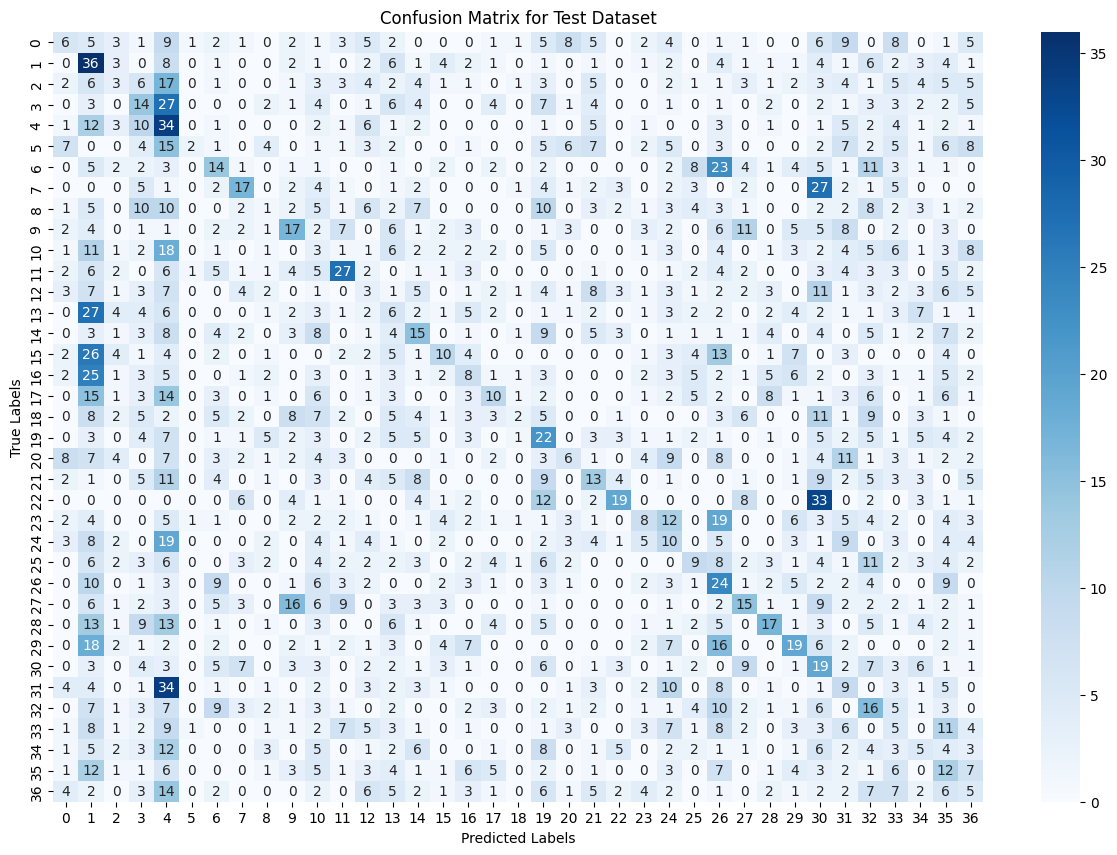

Test Accuracy: 12.56%


In [ ]:
# Function to compute accuracy
def compute_accuracy(predictions, true_labels):
    # If predictions are probabilities for binary classification
    if len(predictions.shape) == 1:
        predicted_classes = predictions.round()  # Convert probabilities to binary classes
    else:
        _, predicted_classes = torch.max(predictions.data, 1)  # For multi-class classification

    # Calculate the number of correct predictions
    correct_predictions = (predicted_classes == true_labels).sum().item()
    accuracy_percentage = (correct_predictions / len(true_labels)) * 100

    return accuracy_percentage


# Performance on Test Data
# Evaluate the trained model using the test dataset. Generate and visualize the confusion matrix for this dataset.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data loader for the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize lists to capture true and predicted labels
actual_labels = []
predicted_labels = []

# Set the model to evaluation mode and assess its performance on the test data
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        # Get predictions from the model
        outputs = model(images)
        _, predicted_classes = torch.max(outputs.data, 1)
        actual_labels.extend(labels.numpy())
        predicted_labels.extend(predicted_classes.numpy())

# Generate the confusion matrix
confusion_mat = confusion_matrix(actual_labels, predicted_labels)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Dataset")
plt.show()

# Calculate overall accuracy
accuracy = compute_accuracy(torch.tensor(predicted_labels), torch.tensor(actual_labels))
print(f"Test Accuracy: {accuracy:.2f}%")
